In [4]:
import get_data as get_data
import load_data as load

import pandas as pd
import seaborn as sns
from pylab import rcParams
import numpy as np
import matplotlib.pyplot as plt
import sqlalchemy

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

In [2]:
import plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)

# Зависимость поисковых запросов

In [23]:
from dateutil import parser

In [98]:
from pytrends.request import TrendReq


# ethereum

def retrieve_google_trends(start_date='2017-05-15', end_date=''):
    if end_date == '':
        import datetime as dt
        end_date = str(dt.datetime.today())[:10]
    period = start_date + ' ' + end_date
    pytrend = TrendReq('qserxsdiv@gmail.com', 'Werewolf$1', custom_useragent='My Pytrends Script')
    pytrend.build_payload(kw_list=['blockchain', 'eth','ethereum','etherium', 'poloniex'], timeframe=period)
    return pytrend.interest_over_time()


df = retrieve_google_trends()

In [99]:
data = get_data.get_data_frame('USDT_ETH', 'poloniex')
data.index = data.date
df = df.astype('int')

df.index = pd.to_datetime(df.index)
frame = df.join(data.close)


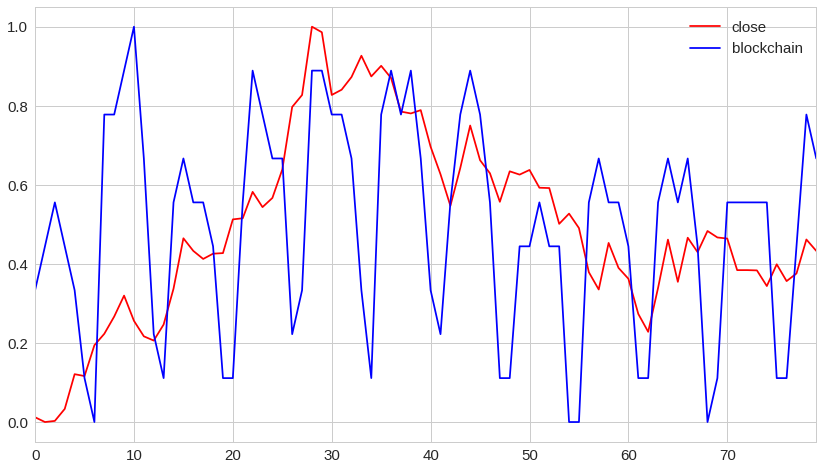

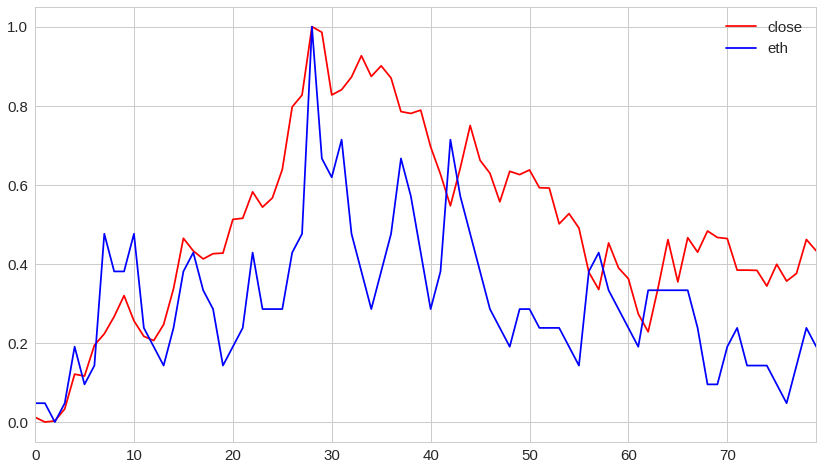

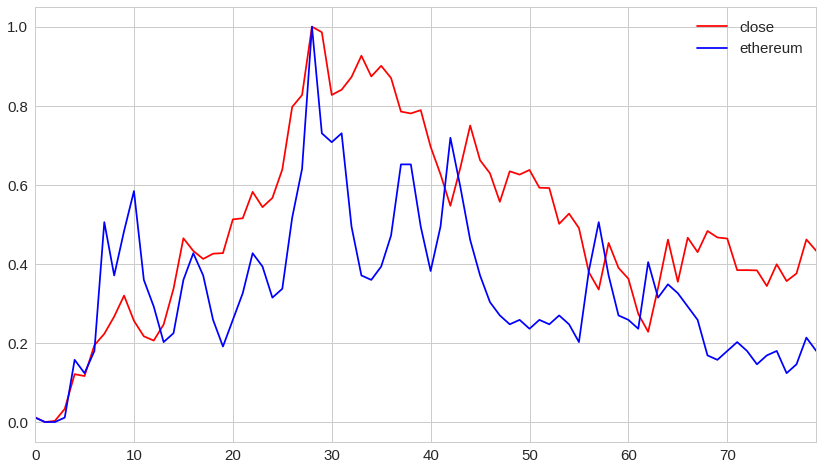

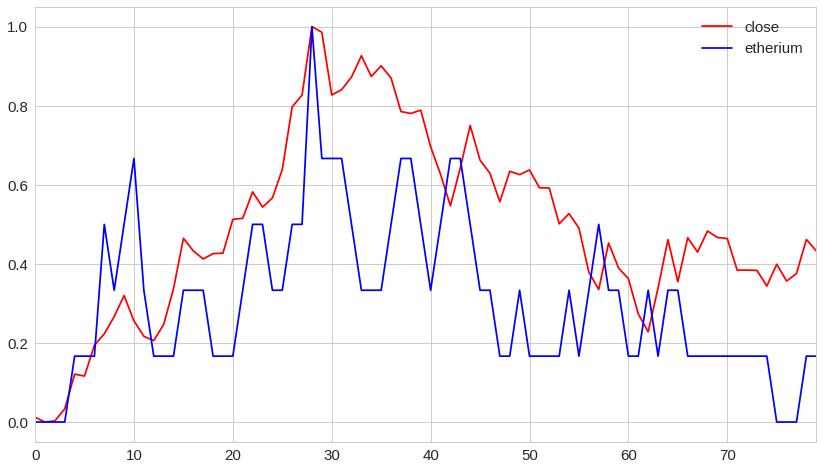

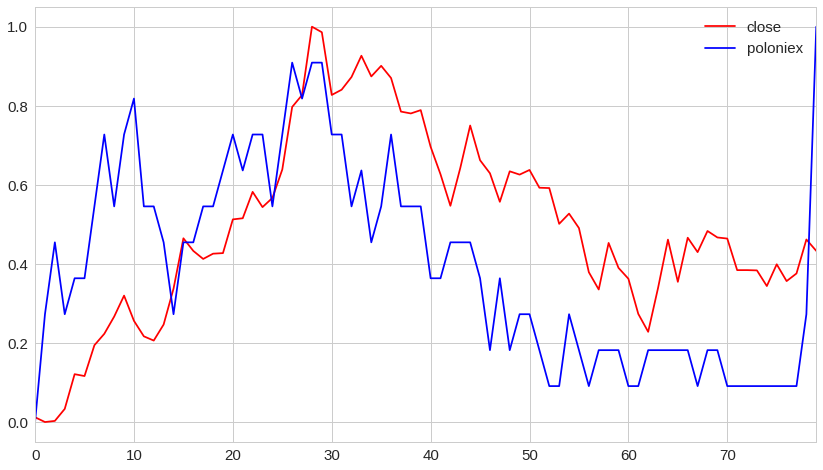

In [100]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

sc = scaler.fit_transform(frame)
sc_dataframe =  pd.DataFrame(sc,columns=frame.columns)       

for i in ['blockchain', 'eth','ethereum','etherium', 'poloniex']:
    sc_dataframe[['close', i]].plot(color = ('red', 'blue'))

In [81]:
maxMin = frame['etherium'].max() - frame['etherium'].min()
mean = frame['etherium'].mean()
frame['etherium'] = frame['etherium'].map(lambda x: (x - mean) / maxMin)

In [82]:
maxMin = frame['close'].max() - frame['close'].min()
mean = frame['close'].mean()
frame['close'] = frame['close'].map(lambda x: (x - mean) / maxMin)

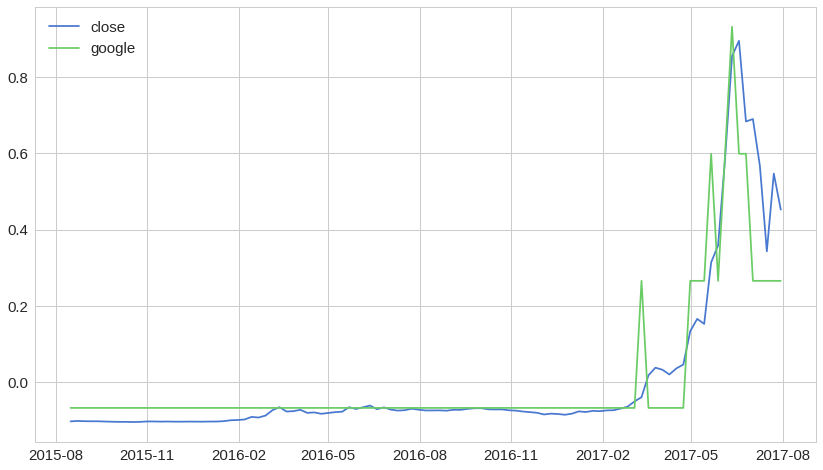

In [83]:
plt.plot(frame.index, frame['close'], label='close')
plt.plot(frame.index, frame['etherium'], label='google')
plt.legend(loc='upper left')
plt.show()

In [92]:
newdata = pd.date_range(df.index[0],unsampled.last_valid_index()+ datetime.timedelta(6), freq='W' )

In [94]:
df = df.astype('int')

In [95]:
unsampled = df.resample('D').interpolate(method='cubic')

In [103]:
unsampled.tail()

,blockchain,eth,ethereum,btc,bitcoin
2017-08-02,6.989753,5.113790,13.182023,19.940041,83.862088
2017-08-03,6.988728,5.125169,13.212470,20.009555,84.291154
2017-08-04,6.989753,5.113790,13.202431,19.899225,83.433516
2017-08-05,6.993340,5.073963,13.136682,19.574292,81.074643
2017-08-06,7.000000,5.000000,13.000000,19.000000,77.000000


In [104]:
btc = get_data.get_data_frame('USDT_BTC', 'poloniex')

btc_close = btc.close
btc_close.index = btc.date

dataframe = unsampled.join(btc_close).dropna()

In [106]:
dataframe = unsampled.join(btc_close).dropna()

In [107]:
dataframe.tail()

,blockchain,eth,ethereum,btc,bitcoin,close
2017-07-30,7.000000,5.000000,13.000000,19.000000,77.000000,2753.000000
2017-07-31,6.995901,5.045516,13.060564,19.400506,80.001978,2855.000000
2017-08-01,6.992315,5.085342,13.126313,19.725439,82.360852,2736.482685
2017-08-02,6.989753,5.113790,13.182023,19.940041,83.862088,2699.000000
2017-08-03,6.988728,5.125169,13.212470,20.009555,84.291154,2794.890000


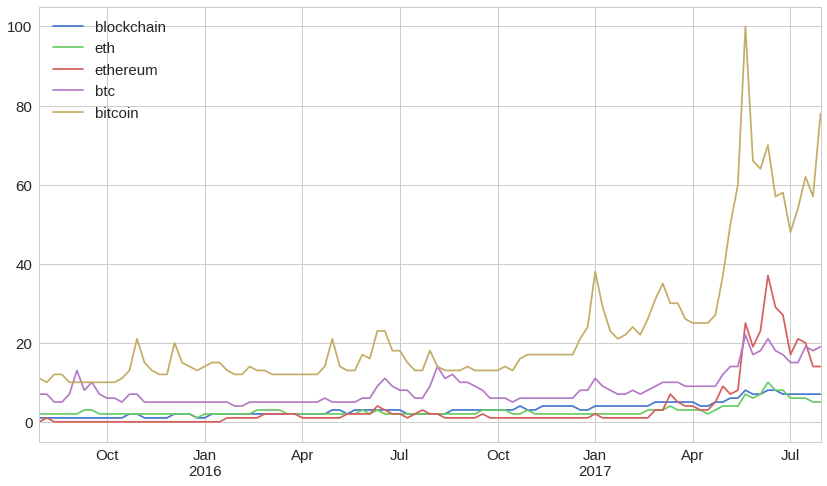

In [111]:
searchRequest = pd.read_csv('../data/multiTimeline_2.csv', names= ['date','blockchain', 'eth','ethereum','btc','bitcoin'])
searchRequest = searchRequest[2:]
searchRequest.index = [ parser.parse(x) for  x in searchRequest.date]
searchRequest = searchRequest[['blockchain', 'eth','ethereum','btc','bitcoin']]
searchRequest = searchRequest.astype('int')

searchRequest.plot()

unsampled = searchRequest.resample('D').interpolate(method='cubic')

In [112]:
unsampled.tail()

,blockchain,eth,ethereum,btc,bitcoin
2017-07-26,6.997859,4.728595,12.593173,17.483602,59.761699
2017-07-27,6.997645,4.713700,12.525960,17.556452,62.456236
2017-07-28,6.997859,4.749004,12.715622,17.810132,66.292311
2017-07-29,6.998608,4.841954,13.195767,18.279647,71.422655
2017-07-30,7.000000,5.000000,14.000000,19.000000,78.000000


In [96]:
btc = get_data.get_data_frame('USDT_BTC', 'poloniex')

btc_close = btc.close
btc_close.index = btc.date

dataframe = unsampled.join(btc_close).dropna()
btc_close = btc.close
btc_close.index = btc.date

dataframe = unsampled.join(btc_close).dropna()


In [97]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

sc = scaler.fit_transform(dataframe)
sc_dataframe =  pd.DataFrame(sc,columns=dataframe.columns)       


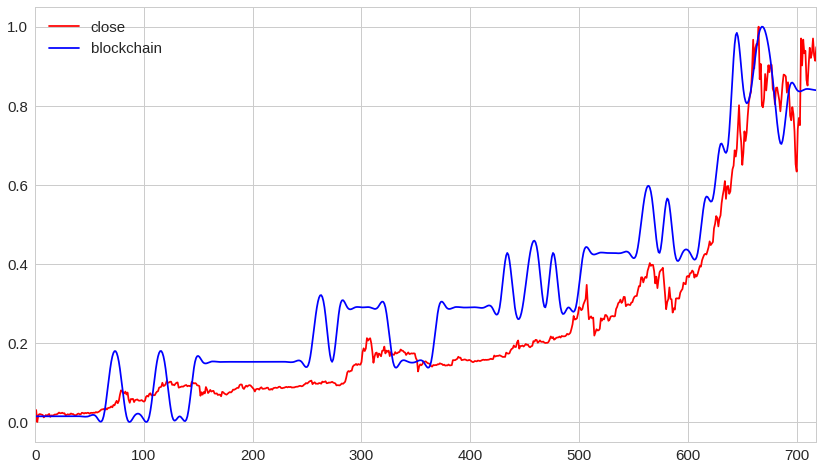

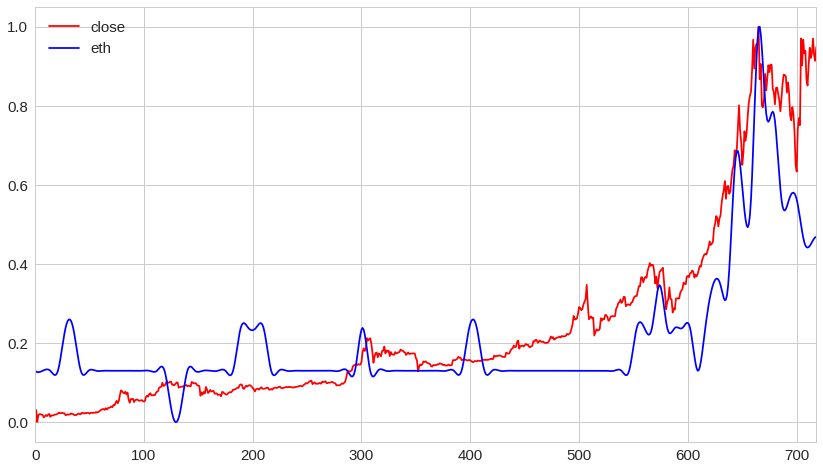

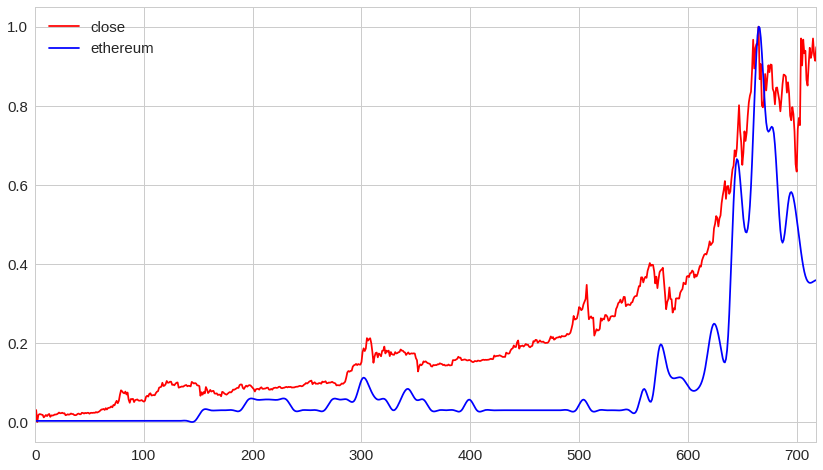

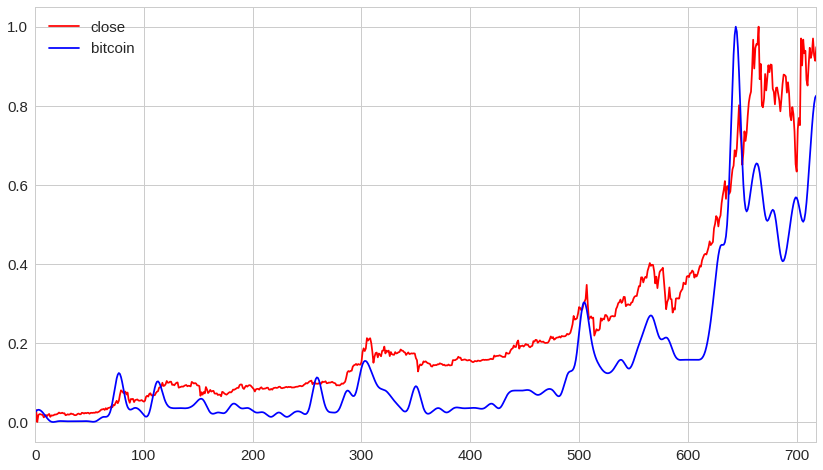

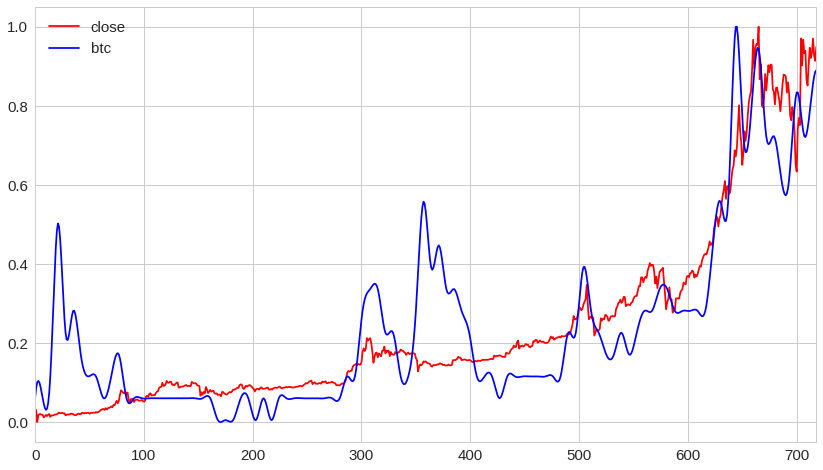

In [98]:
for i in ['blockchain', 'eth', 'ethereum',  'bitcoin', 'btc']:
    sc_dataframe[['close', i]].plot(color = ('red', 'blue'))

/root/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning:

pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(com=2,min_periods=0,adjust=True,ignore_na=False).mean()



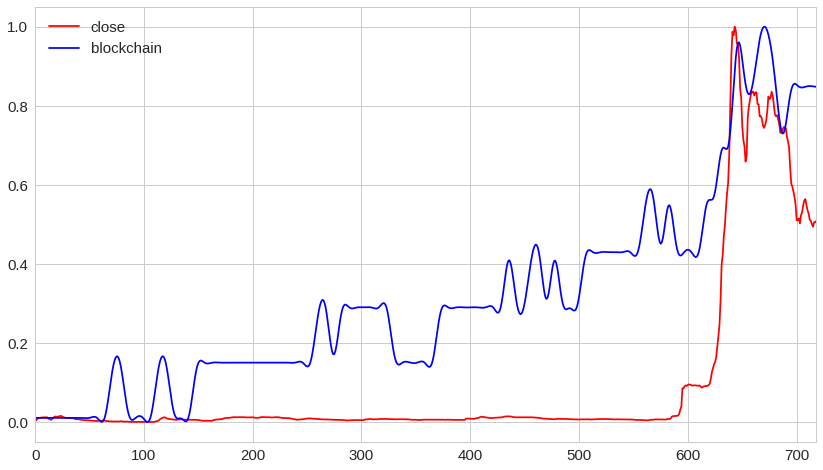

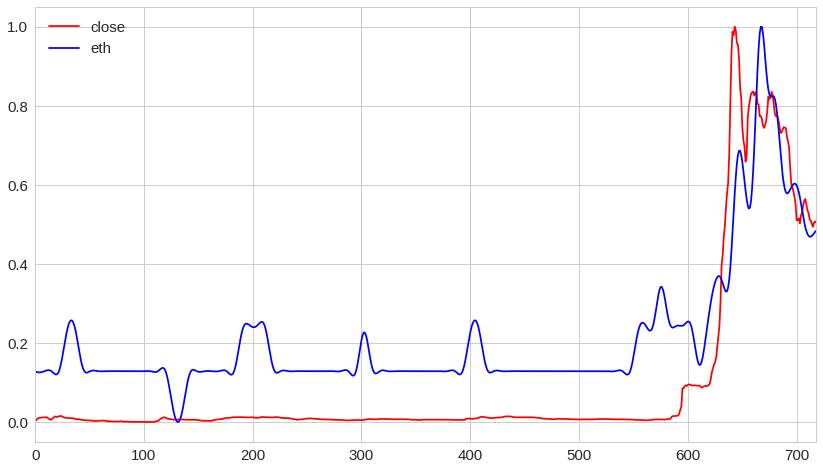

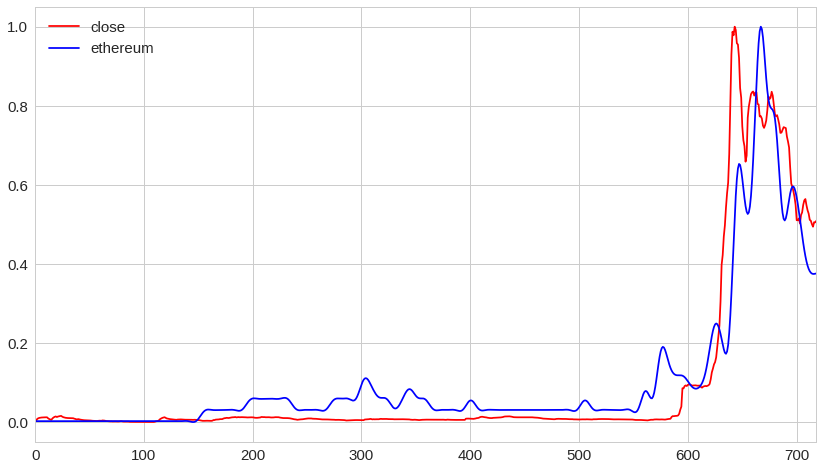

In [99]:
eth = get_data.get_data_frame('USDT_XRP', 'poloniex')

eth_close = eth.close
eth_close.index = eth.date

dataframe = unsampled.join(eth_close).dropna()
eth_close = eth.close
eth_close.index = eth.date

dataframe = unsampled.join(eth_close).dropna()

dataframe = pd.ewma(dataframe,2)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

sc = scaler.fit_transform(dataframe)
sc_dataframe =  pd.DataFrame(sc,columns=dataframe.columns)       

for i in ['blockchain', 'eth', 'ethereum']:
    sc_dataframe[['close', i]].plot(color = ('red', 'blue'))